In [1]:
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
flist = sorted([file for root, subs, files in os.walk(".")
                for file in files if file.endswith(".physical")])

z = array([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50,
           0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])

u = array([13.48e9, 12.80e9, 12.17e9, 11.59e9, 11.04e9, 10.53e9, 10.06e9, 9.61e9, 9.19e9,
           8.80e9, 8.43e9, 8.09e9, 7.76e9, 7.46e9, 7.17e9, 6.90e9, 6.64e9, 6.40e9, 6.18e9,
           5.96e9, 5.76e9])

p50, p16, p84 = [], [], []
for i, f in enumerate(flist):
    t = loadtxt(f)
    t = t[(t[:, 3]<=log10(u[i]))&(t[:, 6]>=-0.4), :]
    
    t[:, [0, 1]] = log10(t[:, [0, 1]])
    
    err   = t[:, 1::2] - t[:, ::2]
    stats = percentile(err, [50, 16, 84], axis=0)
    
    p50.append(stats[0])
    p16.append(stats[1])
    p84.append(stats[2])

p50 = array(p50)
p16 = array(p16)
p84 = array(p84)

[-0.00210355] [-0.153856] [ 0.17160084]
[-0.028114] [-0.3045508] [ 0.29375428]
[-0.0174695] [-0.20064928] [ 0.17287448]
[ 0.097699] [-0.56753024] [ 0.64347036]
[-0.0188] [-0.66514476] [ 0.4501076]
[-0.013268] [-0.1859] [ 0.204021]


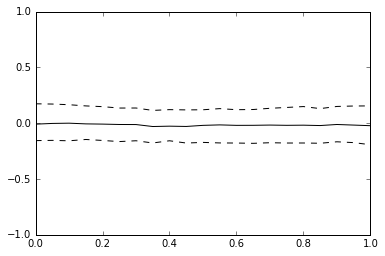

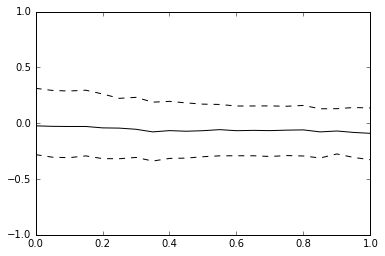

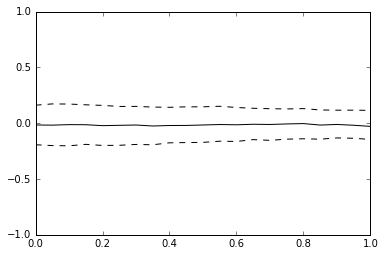

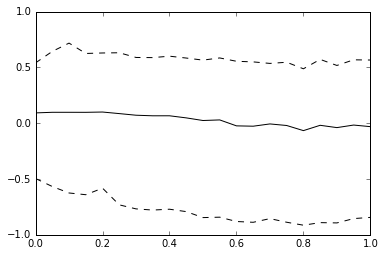

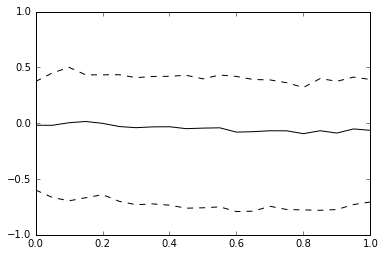

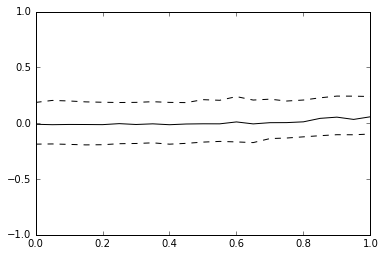

In [3]:
for i in xrange(6):
    figure()
    plot(z, p50[:, i], '-k', z, p16[:, i], '--k', z, p84[:, i], '--k')
    print p50[z==0.05, i], p16[z==0.05, i], p84[z==0.05, i]
    ylim(-1, +1)

In [4]:
db_outs = loadtxt("Zall_solutions/dynbas_output.log", usecols=(2, 3, 4, 5, 6, 7))
db_outs[:, 0] = log10(db_outs[:, 0])

flist = sorted([os.path.join(root, file) for root, subs, files in os.walk("Zall_solutions")
               for file in files if file.startswith("dynbasfit_sed")])
z_cha = []
for f in flist:
    t = open(f, "r")
    line = t.readline()[:-1]
    while "redshift" not in line: line = t.readline()[:-1]
    t.close()
    z_cha.append(eval(line.split("=")[1]))

z_cha = array(z_cha)

In [5]:
z   = array([0.0, 0.5, 1.0])
p16 = array([[-0.28, -0.26, -0.18, -0.22, -0.18, -0.19],
             [-0.33, -0.30, -0.17, -0.29, -0.25, -0.17],
             [-0.36, -0.33, -0.15, -0.31, -0.29, -0.10]])
p50 = array([[-0.00, -0.01, -0.01, -0.02, -0.01, -0.02],
             [-0.04, -0.07, -0.02, +0.01, +0.01, -0.01],
             [-0.05, -0.09, -0.03, -0.01, -0.01, +0.06]])
p84 = array([[+0.57, +0.36, +0.17, +0.23, +0.23, +0.13],
             [+0.32, +0.17, +0.15, +0.21, +0.21, +0.21],
             [+0.43, +0.14, +0.11, +0.20, +0.20, +0.24]])

table = []
for i in xrange(6):
    p50_cha = interp(z_cha, z, p50[:, i])
    p16_cha = interp(z_cha, z, p16[:, i])
    p84_cha = interp(z_cha, z, p84[:, i])
    
    table.append(db_outs[:, i]-p50_cha)
    table.append(db_outs[:, i]+p16_cha)
    table.append(db_outs[:, i]+p84_cha)
    
table = array(table).T

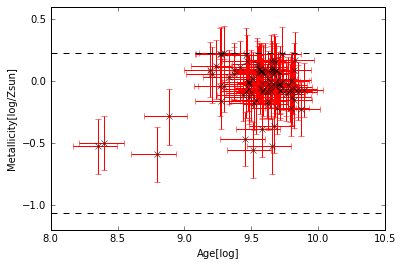

In [8]:
errorbar(table[:, 6], table[:, 12],
         yerr=[table[:, 12]-table[:, 13], table[:, 14]-table[:, 12]],
         xerr=[table[:, 6]-table[:, 7], table[:, 8]-table[:, 6]], fmt='xk', ecolor='r')

axhline(0.22271647114758325, ls="--", color="k")
axhline(-1.0685421293109949, ls="--", color="k")

xlabel('Age[log]')
ylabel('Metallicity[log/Zsun]')
#savefig("/home/alfredo/z_vs_t_challenge.pdf", bbox_inches='tight')

In [ ]:
#hdr = ('%10s'+17*'%12s')%tuple("m_mode m_p16 m_p84 mwmt_mode mwmt_p16 mwmt_p84 lwmt_mode lwmt_p16 lwmt_p84 mwmz_mode mwmz_p16 mwmz_p84 lwmz_mode lwmz_p16 lwmz_p84 av_mode av_p16 av_p84".split())
#savetxt("challenge_solutions.log", table, fmt=18*'%12.4f', header=hdr)